In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import torch
import librosa.display as lrdisplay
import librosa.feature as lrfeature

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as skmetrics

from vxs import *
from vxs.utils import *

In [2]:
avp_set_fixed = AVPTrackSet('../data/AVP_Dataset', subset='Fixed')
avp_segments_fixed = SegmentSet(avp_set_fixed)

In [3]:
len(avp_segments_fixed)

4897

In [4]:
segm, cl = avp_segments_fixed[20]

hho


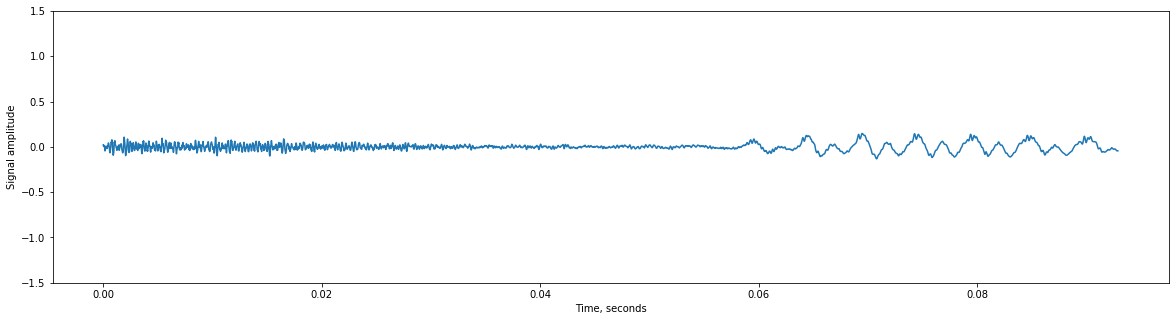

In [5]:
print(cl)
plot_track(segm)

In [6]:
issubclass(type(segm), Track)

True

In [7]:
play_audio(segm)

In [8]:
def unzip_dataset(dataset):
    X = []
    y = []
    for features, label in dataset:
        X.append(features)
        y.append(label)
    return X, y

In [9]:
X, y = unzip_dataset(avp_segments_fixed)

In [12]:
model = make_knn_classic('mfcc')
model.fit(X, y)

Pipeline(steps=[('features', ClassicFeatureTransformer(feature_type='mfcc')),
                ('normalizer', Normalizer()), ('knn', KNeighborsClassifier())])

In [13]:
avp_set_personal = AVPTrackSet('../data/AVP_Dataset', subset='Personal')
avp_segments_personal = SegmentSet(avp_set_personal)

In [14]:
len(avp_segments_personal)

4306

In [15]:
X_test, y_test = unzip_dataset(avp_segments_personal)

In [16]:
y_pred = model.predict(X_test)

In [17]:
skmetrics.confusion_matrix(y_test, y_pred)

array([[ 655,  207,   67,  106],
       [ 383,  374,   34,  107],
       [ 124,   37, 1002,  110],
       [ 247,  352,   81,  420]])

In [18]:
skmetrics.accuracy_score(y_test, y_pred)

0.5692057594054807

In [19]:
model.classes_

array(['hhc', 'hho', 'kd', 'sd'], dtype='<U3')

In [20]:
model2 = make_knn_classic('ramires')
model2.fit(X, y)

Pipeline(steps=[('features', ClassicFeatureTransformer(feature_type='ramires')),
                ('normalizer', Normalizer()), ('knn', KNeighborsClassifier())])

In [21]:
y_pred2 = model2.predict(X_test)

In [22]:
skmetrics.confusion_matrix(y_test, y_pred2)

array([[534, 243,  99, 159],
       [402, 343,  66,  87],
       [240,  45, 726, 262],
       [403, 336,  52, 309]])

In [24]:
skmetrics.accuracy_score(y_test, y_pred2)

0.4440315838365072